In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
csv_path= '/Users/y1u0d2/Desktop/Lab/result/sf/merge_base/merge_O-O.csv'

In [45]:
df = pd.read_csv(csv_path)
df.columns
descriptor_labels = []
for column in df.columns:
    if 'sf_' in column:
        descriptor_labels.append(column)

descriptor_labels
target_label ='E_atom'
df

,Unnamed: 0,another_atom,center_atom,structure_idx,structure,sf_O-O_e-41.43_rs-0.6,sf_O-O_e-26.14_rs-0.7554,sf_O-O_e-16.49_rs-0.9509,sf_O-O_e-10.41_rs-1.197,sf_O-O_e-6.567_rs-1.507,sf_O-O_e-4.143_rs-1.897,sf_O-O_e-2.614_rs-2.389,sf_O-O_e-1.649_rs-3.007,sf_O-O_e-1.041_rs-3.786,sf_O-O_e-0.6567_rs-4.766,natom,E,Vol,E_atom
0,0,O,O,422,stishovite,2.699542e-42,1.889485e-63,2.601077e-73,2.861999e-77,1.813066e-78,1.075136e-78,6.399094e-79,1.249698e-79,4.956257e-81,3.560742e-83,48,-1011.339748,345.233252,-21.069578
1,1,O,O,348,stishovite,2.975202e-32,1.399045e-47,2.526112e-54,9.346100e-57,2.435542e-57,1.872028e-57,7.967462e-58,8.520246e-59,1.700900e-60,6.244581e-63,48,-1010.282651,340.518733,-21.047555
2,2,O,O,354,stishovite,1.103767e-53,1.326065e-81,3.552413e-95,4.894930e-101,4.355673e-103,1.405728e-103,9.361395e-104,2.892176e-104,2.075296e-105,2.742550e-107,48,-1011.223228,436.375518,-21.067151
3,3,O,O,436,stishovite,4.418162e-42,3.092395e-63,4.257011e-73,4.684046e-77,2.967325e-78,1.759605e-78,1.047297e-78,2.045298e-79,8.111580e-81,5.827632e-83,48,-1010.934431,345.233252,-21.061134
4,4,O,O,410,stishovite,5.268537e-43,3.687596e-64,5.076368e-74,5.585596e-78,3.538454e-79,2.098280e-79,1.248873e-79,2.438962e-80,9.672836e-82,6.949292e-84,48,-1011.425733,345.233252,-21.071369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,8545,O,O,627,beta-quartz,2.976850e-67,7.075051e-103,9.409180e-121,6.832886e-129,4.931943e-132,6.107702e-133,3.639091e-133,1.539829e-133,1.819587e-134,4.155428e-136,36,-758.023464,614.263231,-21.056207
8546,8546,O,O,141,beta-quartz,6.842771e-54,8.220903e-82,2.202309e-95,3.034598e-101,2.700287e-103,8.714771e-104,5.803570e-104,1.792996e-104,1.286574e-105,1.700236e-107,36,-757.869465,440.160169,-21.051930
8547,8547,O,O,169,beta-quartz,7.221885e-67,1.716418e-102,2.282682e-120,1.657669e-128,1.196497e-131,1.481738e-132,8.828490e-133,3.735649e-133,4.414346e-134,1.008113e-135,36,-758.476665,497.119773,-21.068796
8548,8548,O,O,198,beta-quartz,2.663372e-54,3.199775e-82,8.571918e-96,1.181139e-101,1.051017e-103,3.392000e-104,2.258890e-104,6.978776e-105,5.007656e-106,6.617730e-108,36,-757.743322,497.119773,-21.048426


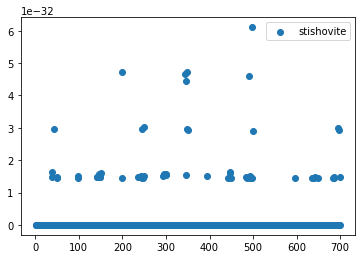

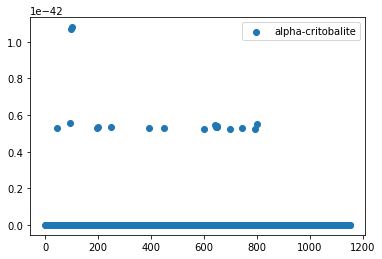

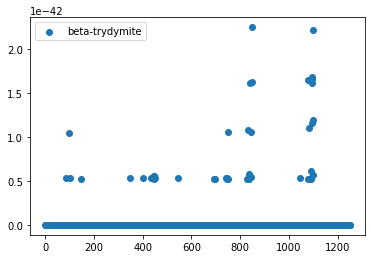

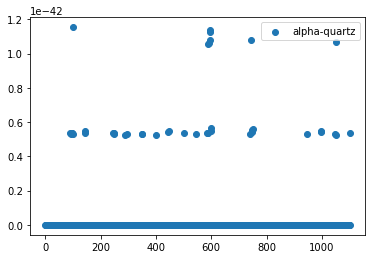

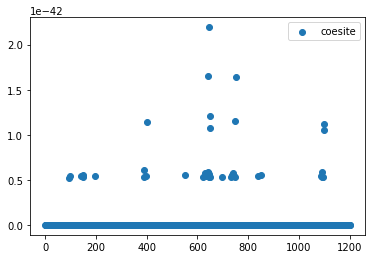

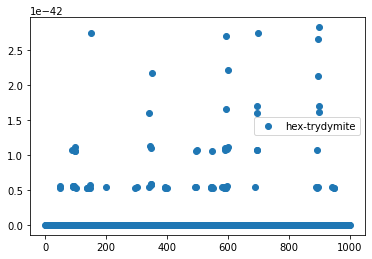

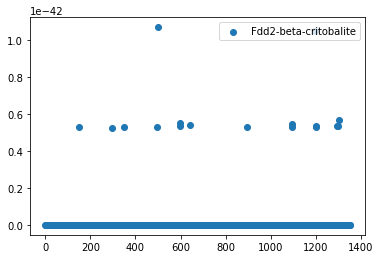

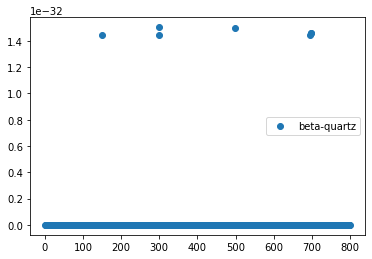

In [33]:
fig, ax = plt.subplots()
structures = df.structure.unique()
for structure in structures:
    plt.scatter(x=df[df.structure == structure].structure_idx,y=df[df.structure == structure][descriptor_labels[0]],label=structure)
    plt.legend()
    plt.show()


In [39]:
Xraw = df.loc[:, descriptor_labels].values
y = df.loc[:, target_label].values

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xraw)
X = scaler.transform(Xraw)

In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg = LinearRegression()
reg.fit(X,y)
yp = reg.predict(X)
all_r2_score = reg.score(X,y)
print(all_r2_score)
print(reg.coef_, reg.intercept_)

0.02049711228868689
[2128712.75227586 -236520.50267102 -236523.96870121 -236523.9879744
 -236524.00143003 -236524.07988526 -236523.99931008 -236524.10767579
 -236524.02405704 -236524.07970667] -21.061372010023305


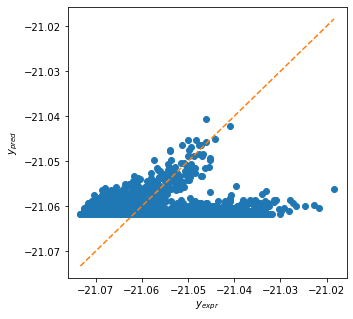

In [43]:
# 当てはめ度合い
plt.figure(figsize=(5,5))
yall = np.hstack([y,yp])
ylim = yall.min(), yall.max()
plt.plot(y,yp,"o")
plt.plot(ylim,ylim,"--")
plt.xlabel("$y_{expr}$")
plt.ylabel("$y_{pred}$")
plt.show()